<a href="https://colab.research.google.com/github/Manish3690/ResponseSpectra/blob/main/ResponseSpectra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code will be for the generation of response spectrum.


---


**Basic Theory**


---


  Pseudo-acceleration Response spectrum will be constructed based on many earthquake samples.
  Consider a strructure of certain height,h and mass,m concentrated at the top.
  Then, natural period of vibration, based on modal analysis, and damping ratio are selcted.
  Deformational responses of the structural system is calculated.
  Pseudo-acceleration= (2*pi/Tn)^2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [ ]:
def TimePeriod(E,I,L,m):
  k=3*E*I/(L**3)
  nat_frrq=np.sqrt(k/m)
  Tn=2*np.pi/nat_frrq
  return Tn,nat_frrq,k



def Newmark(earthquake, mass, damping_ratio, nat_frq, k, del_t):
    """
    Perform dynamic analysis using the Newmark-beta method.

    Parameters:
    earthquake (list or np.array): Ground acceleration time history.
    mass (float): Mass of the system.
    damping_ratio (float): Damping ratio.
    nat_frq (float): Natural frequency of the system.
    k (float): Stiffness of the system.
    del_t (float): Time step.

    Returns:
    u_max (float): maximum displacement.
    """
    # Newmark parameters for average acceleration
    alpha = 0.5
    beta = 0.25

    # System properties
    c = 2 * damping_ratio * nat_frq * mass
    k_app = k + alpha * c / (beta * del_t) + mass / (beta * del_t ** 2)

    # Initialize arrays
    n_steps = len(earthquake)
    u = np.zeros(n_steps+1)  # Displacement
    vel = np.zeros(n_steps+1)  # Velocity
    acc = np.zeros(n_steps+1)  # Acceleration

    # Effective force
    for i in range(n_steps):
        effective_force = (
            earthquake[i] * mass * 9.81
            + (mass / (beta * del_t ** 2) + alpha * c / (beta * del_t)) * u[i]
            + (mass / (beta * del_t) + (alpha / beta - 1) * c) * vel[i]
            + ((1 / (2 * beta) - 1) * mass + del_t * (alpha / (2 * beta) - 1) * c) * acc[i]
        )
        u[i+1] = effective_force / k_app
        vel[i+1] = (
            alpha / (beta * del_t) * (u[i+1] - u[i])
            + (1 - alpha / beta) * vel[i]
            + (1 - alpha / (2 * beta)) * del_t * acc[i]
        )
        acc[i] = (earthquake[i]*9.81*mass - c * vel[i] - k * u[i]) / mass

    # return u, vel, acc
    u_max=max(u)
    return u_max


In [ ]:

N=1
KN=1e3*N
m=1
cm=1.e-2*m
mm=1e-3*m
Pa=N/m**2
MPa=1e6*Pa



E= 2.e5*MPa
I= 301*cm**4
di=102*mm
do=115*mm
L=0.1*m
M= 1650.0 #kg  not used the mass of the column itself as mass is not much while compared to lumped mass
Tn=0
Time_array=[]
Length_array=[]
nat_frrq_array=[]
K_array=[]
while Tn<=30:
  Tn, nat_frrq, K = TimePeriod(E,I,L,M)
  L+=0.5
  Length_array.append(L)
  Time_array.append(Tn)
  nat_frrq_array.append(nat_frrq)
  K_array.append(K)
print(Time_array)



[0.006005690778882626, 0.08826526776720303, 0.21910485212496042, 0.38436420984848807, 0.5779521844892864, 0.7962014963272956, 1.0365864038780264, 1.2972292082386472, 1.5766625517404023, 1.8736985253937501, 2.187349753928851, 2.516778573734468, 2.86126261202118, 3.2201705272446928, 3.5929443495916917, 3.9790862770781223, 4.378148577805433, 4.789725717333557, 5.213448117663609, 5.648977137100994, 6.096000980014986, 6.554231326054234, 7.023400523823867, 7.503259232993254, 7.993574426692774, 8.494127686353828, 9.004713736139255, 9.52513917533872, 10.055221375616428, 10.594787516527035, 11.143673737775245, 11.701724390653974, 12.268791374222195, 12.844733544272874, 13.429416185138665, 14.022710535997467, 14.62449336465361, 15.234646582846358, 15.85305689802372, 16.479615497253928, 17.114217759558684, 17.75676299346427, 18.40715419699731, 19.065297837715857, 19.731103650675312, 20.404484452491644, 21.085355969889473, 21.77363668131561, 22.469247670365124, 23.172112489910806, 23.8821570359514

In [ ]:


# Load earthquake data
df = pd.read_csv("gorkha_dt 0.005.txt")  # Ensure correct delimiter
df.dropna(inplace=True)  # Remove NaN values

# Convert to numpy array (assuming earthquake data is in the first column)
# earthquake = df.iloc[:, 0]
earthquake = df.to_numpy().flatten()  # If using pandas DataFrame

# earthquake = earthquake[7000:7500]

# System properties
mass = M  # Define M beforehand
damping_ratio = 0.05  # 5% damping
del_t = 0.005  # Time step from data

# Structural properties
# ke = K_array[40]  # Select stiffness from K_array
# nat_freq = nat_frrq_array[40]  # Select natural frequency from nat_frrq_array
u_max=np.zeros(len(K_array))
v_max=np.zeros(len(K_array))
a_max=np.zeros(len(K_array))
# Call the Newmark function
for i in range(len(K_array)):
  u_max[i] = Newmark(earthquake, mass, damping_ratio, nat_frrq_array[i], K_array[i], del_t)
  v_max[i] = 2*math.pi*u_max[i]/Time_array[i]
  a_max[i] = v_max[i]/Time_array[i]




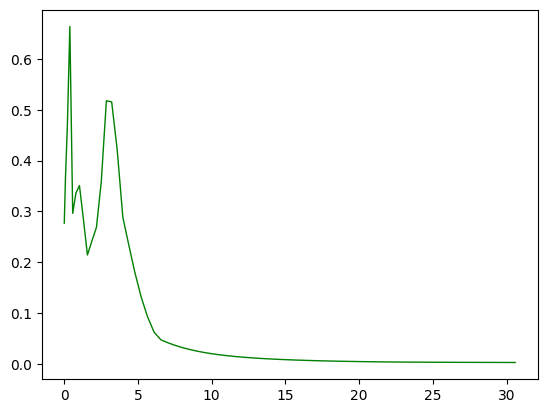

In [ ]:
plt.plot(Time_array, a_max, linewidth=1, color= 'green')
plt.show()